## Importing packages

In [ ]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','preprocessing_clustering.R'))
#install_all_packages()
load_library_packages()

In [2]:
dim(df_during_barriers)

[1] 1215    6

## Clustering - Kmodes Fisher

In [5]:
df_during_barriers_dist <- distinct(df_during_barriers)
nrow(df_during_barriers_dist)

[1] 33

In [6]:
df_during_barriers_dist[c(7), ]

,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_no_interest,PA_barrier_percieve,PA_barrier_time,PA_barrier_hard
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
7,1,0,0,0,1,1


### Fisher

<hr />

#### Scanning parameters

In [49]:
source(here('Modules','modules.R'))
nseed <- 1000
nk <- nrow(distinct(df_during_barriers))
# ks_by_seed <- data.frame(matrix(NA, nrow = nseed, ncol = nk-1))
# for (seed in 1:nseed) {
#     calisnki <- c()
#     for (k in 2:nk) {
#         fs <- calisnki_values_kmodes(k, df_during_barriers_dist, 200, seed)[[1]]
#         calisnki <- append(calisnki, fs)
#     }

#     ks_by_seed[seed, ] <- calisnki
# }

# write.csv(
#     ks_by_seed,
#     "../../Data/calisnki_kmodes_or_barriers.csv", row.names = FALSE
# )

#### Results

In [58]:
cal <- read.csv("../../Data/calisnki_kmodes_or_barriers.csv")
cal[, ncol(cal)+1] <-  seq.int(nrow(cal))
colnames(cal) <- append(2:nrow(distinct(df_during_barriers)), "seed")
head(cal)

,2,3,4,5,6,7,8,9,10,11,...,25,26,27,28,29,30,31,32,33,seed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>
1,7.233333,94.09091,35.64583,212.3333,243.00000,416.0000,13.000000,363.000000,181.44444,10.46897,...,3.7333333,0.6048000,1.7076923,1.6296296,0.4615385,0.19098143,0.04266667,0.010322581,NA,1
2,53.142857,55.38462,971.50000,665.0000,345.60000,111.2222,460.714286,10.026316,296.44444,50.60000,...,2.7179487,5.8240000,0.4165103,0.9971510,0.2971429,0.08578638,0.13333333,0.051612903,NA,2
3,119.490909,1260.00000,460.77778,223.0000,379.80000,888.3333,339.285714,25.772727,78.79630,17.60000,...,3.6000000,0.2458537,0.6213018,0.0767841,0.1530612,0.05793103,0.13333333,0.004962779,NA,3
4,33.932432,172.50000,129.80952,235.6667,66.82500,227.5000,15.000000,22.071429,92.85185,226.60000,...,4.0000000,0.2868293,0.2138837,0.2666667,0.1600000,0.08275862,0.26666667,0.014162077,NA,4
5,52.565217,124.61538,153.59259,374.5000,345.60000,335.8333,9.461153,483.000000,16.35556,338.80000,...,0.9466667,0.5936000,0.1857411,0.2370370,0.3296703,0.57931034,0.02666667,0.002580645,NA,5
6,62.837838,92.64706,309.33333,693.0000,40.70769,192.8333,10.837438,8.689655,126.50000,2.80000,...,0.8133333,1.2923077,0.5353846,0.2529359,0.5054945,0.22281167,0.05333333,0.044665012,NA,6


In [57]:
# options(repr.plot.width=20, repr.plot.height=10)
# ggplot(
#    data=melt(cal, id.vars='seed'), aes(x = variable, y = value)
# ) + geom_point() + facet_wrap(~ seed) 


####  Best K and best seed by highest sample mean

In [51]:
print("Best K")
best_K_kmodes <- match(max(apply(cal, 2, mean)[1:(nk-2)]), apply(cal, 2, mean)) + 1
print(best_K_kmodes)
print("Best Seed")
best_seed_kmodes <- match(max(cal[, best_K_kmodes-1]), cal[, best_K_kmodes-1])
print(best_seed_kmodes)
print("Calisnki")
print(max(cal[, best_K_kmodes-1]))

[1] "Best K"
[1] 5
[1] "Best Seed"
[1] 637
[1] "Calisnki"
[1] 2226


## Exploring Kmodes best k

In [52]:
df_during_barriers_dist$cluster <- kmodes_seed(df_during_barriers_dist, best_K_kmodes, max_iter=200, seed=best_seed_kmodes)$cluster
head(df_during_barriers_dist)

,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_no_interest,PA_barrier_percieve,PA_barrier_time,PA_barrier_hard,cluster
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>
1,1,0,0,0,0,0,2
2,1,0,1,0,0,0,2
3,0,0,0,0,1,0,3
4,1,0,0,0,0,1,2
5,1,1,0,0,0,0,2
6,0,0,0,0,0,1,4


In [53]:
joint <- c(
    'PA_barrier_places_closed_dangerous'='PA_barrier_places_closed_dangerous',
    'PA_barrier_money' = 'PA_barrier_money',
    'PA_barrier_no_interest'='PA_barrier_no_interest',
    'PA_barrier_percieve'='PA_barrier_percieve',
    'PA_barrier_time' = 'PA_barrier_time',
    'PA_barrier_hard' = 'PA_barrier_hard'
)

df_during_barriers <- left_join(df_during_barriers, df_during_barriers_dist, by = joint)
df_during$cluster <- df_during_barriers$cluster
nrow(df_during_barriers)

[1] 1215

In [54]:
table(df_during$cluster)


  1   2   3   4   5 
 98 513 121 472  11 

### Profile Plots
<hr />

#### Practice of Exercise 

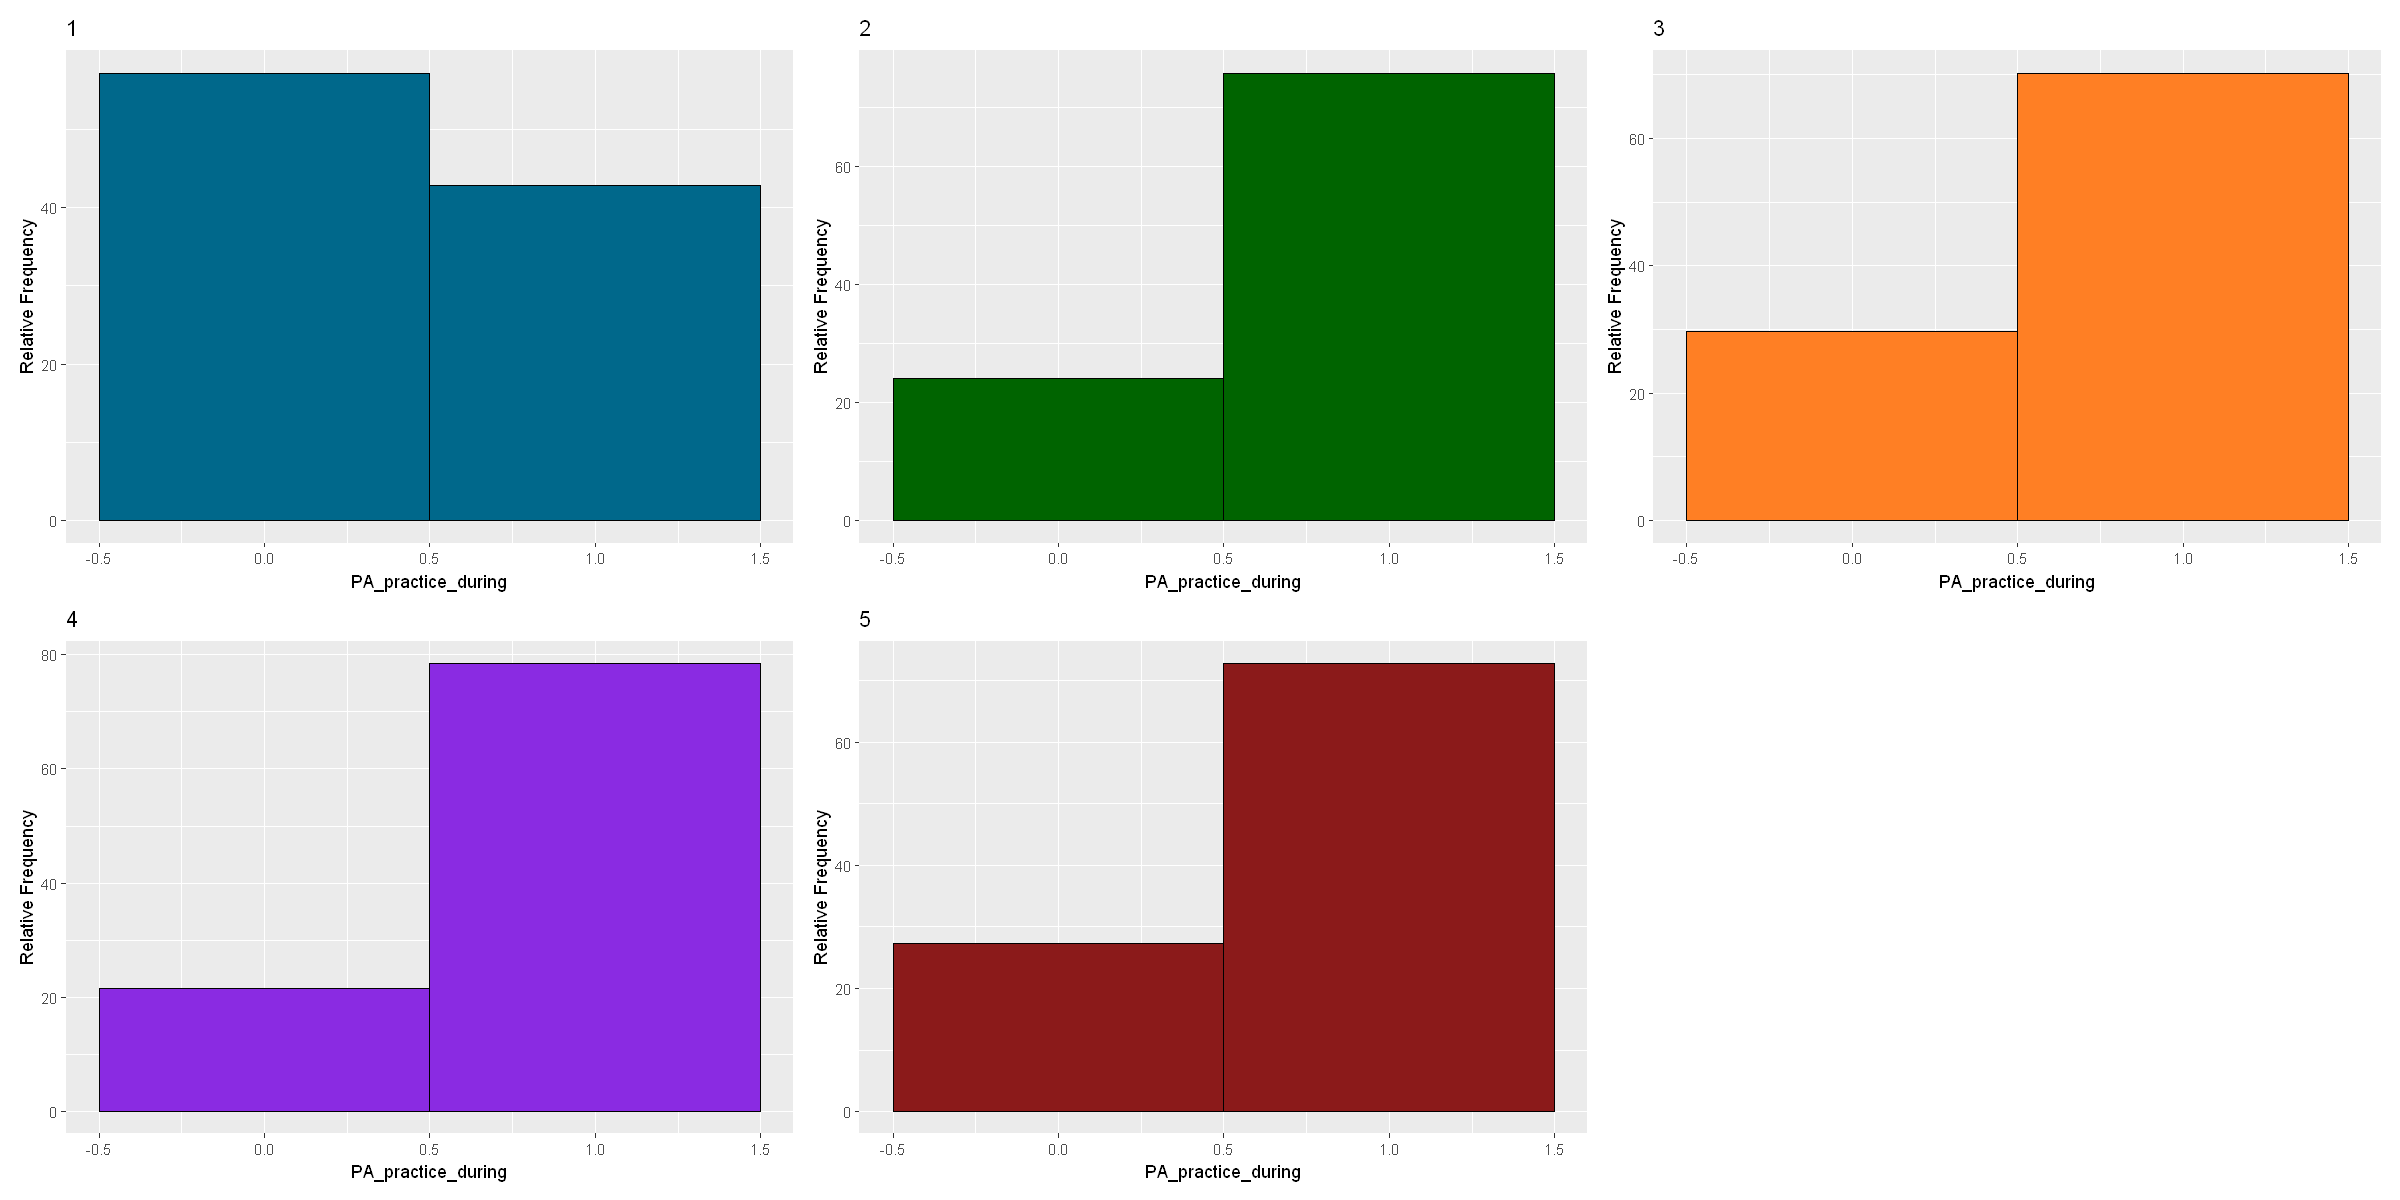

In [55]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_practice_during))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_practice_during, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency") + ggtitle(cl)
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)


#### Sedentary Behavior

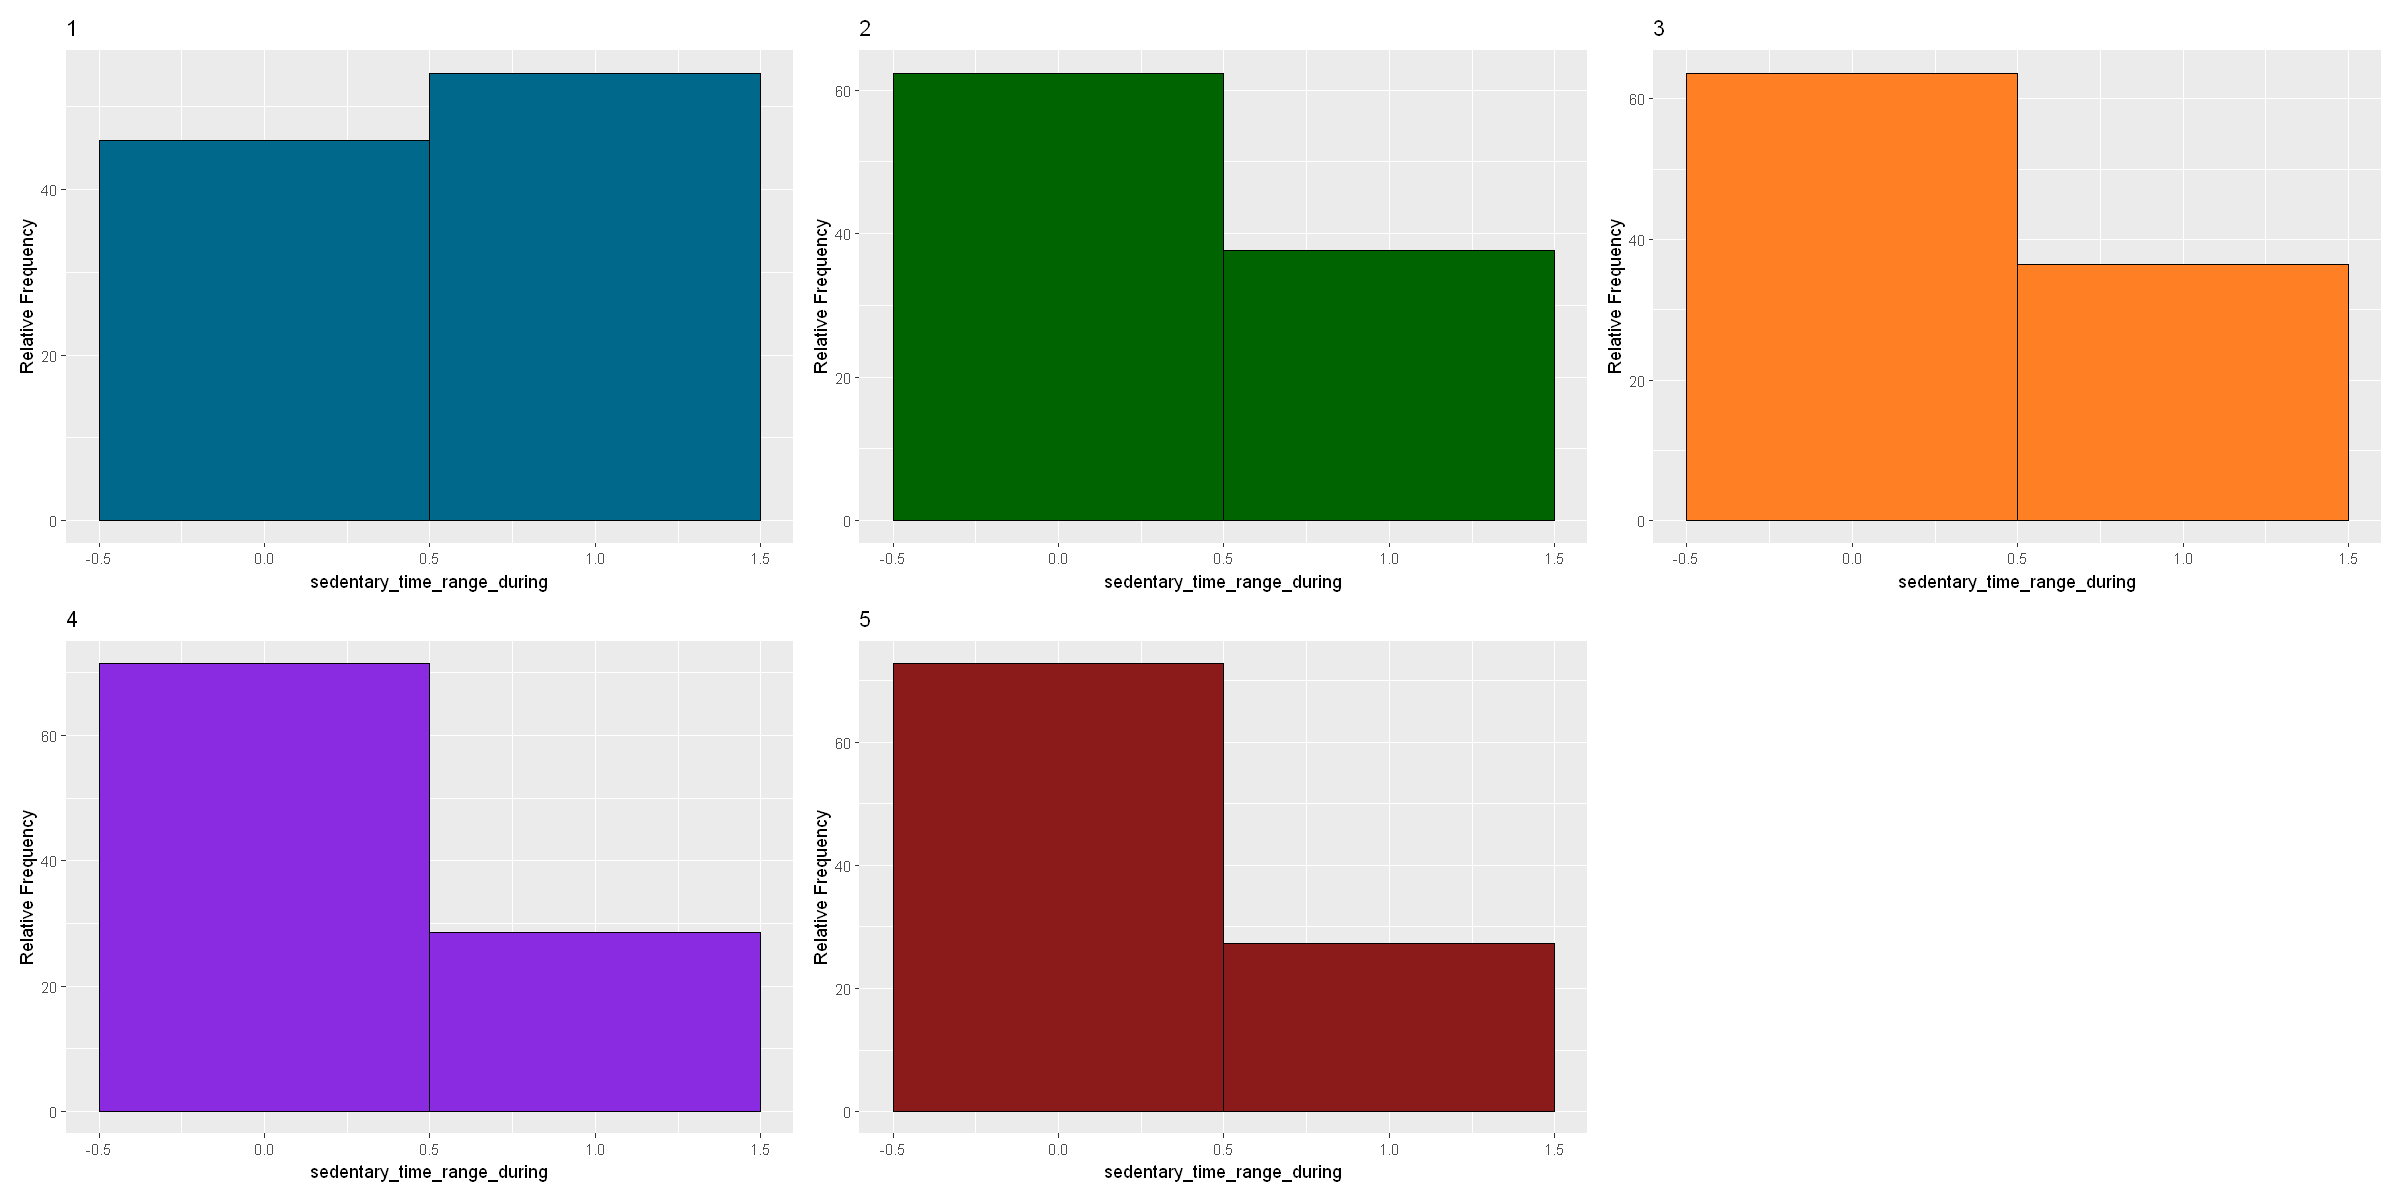

In [56]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$sedentary_time_range_during))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=sedentary_time_range_during, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency") + ggtitle(cl)
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)


#### Exercise Intensity

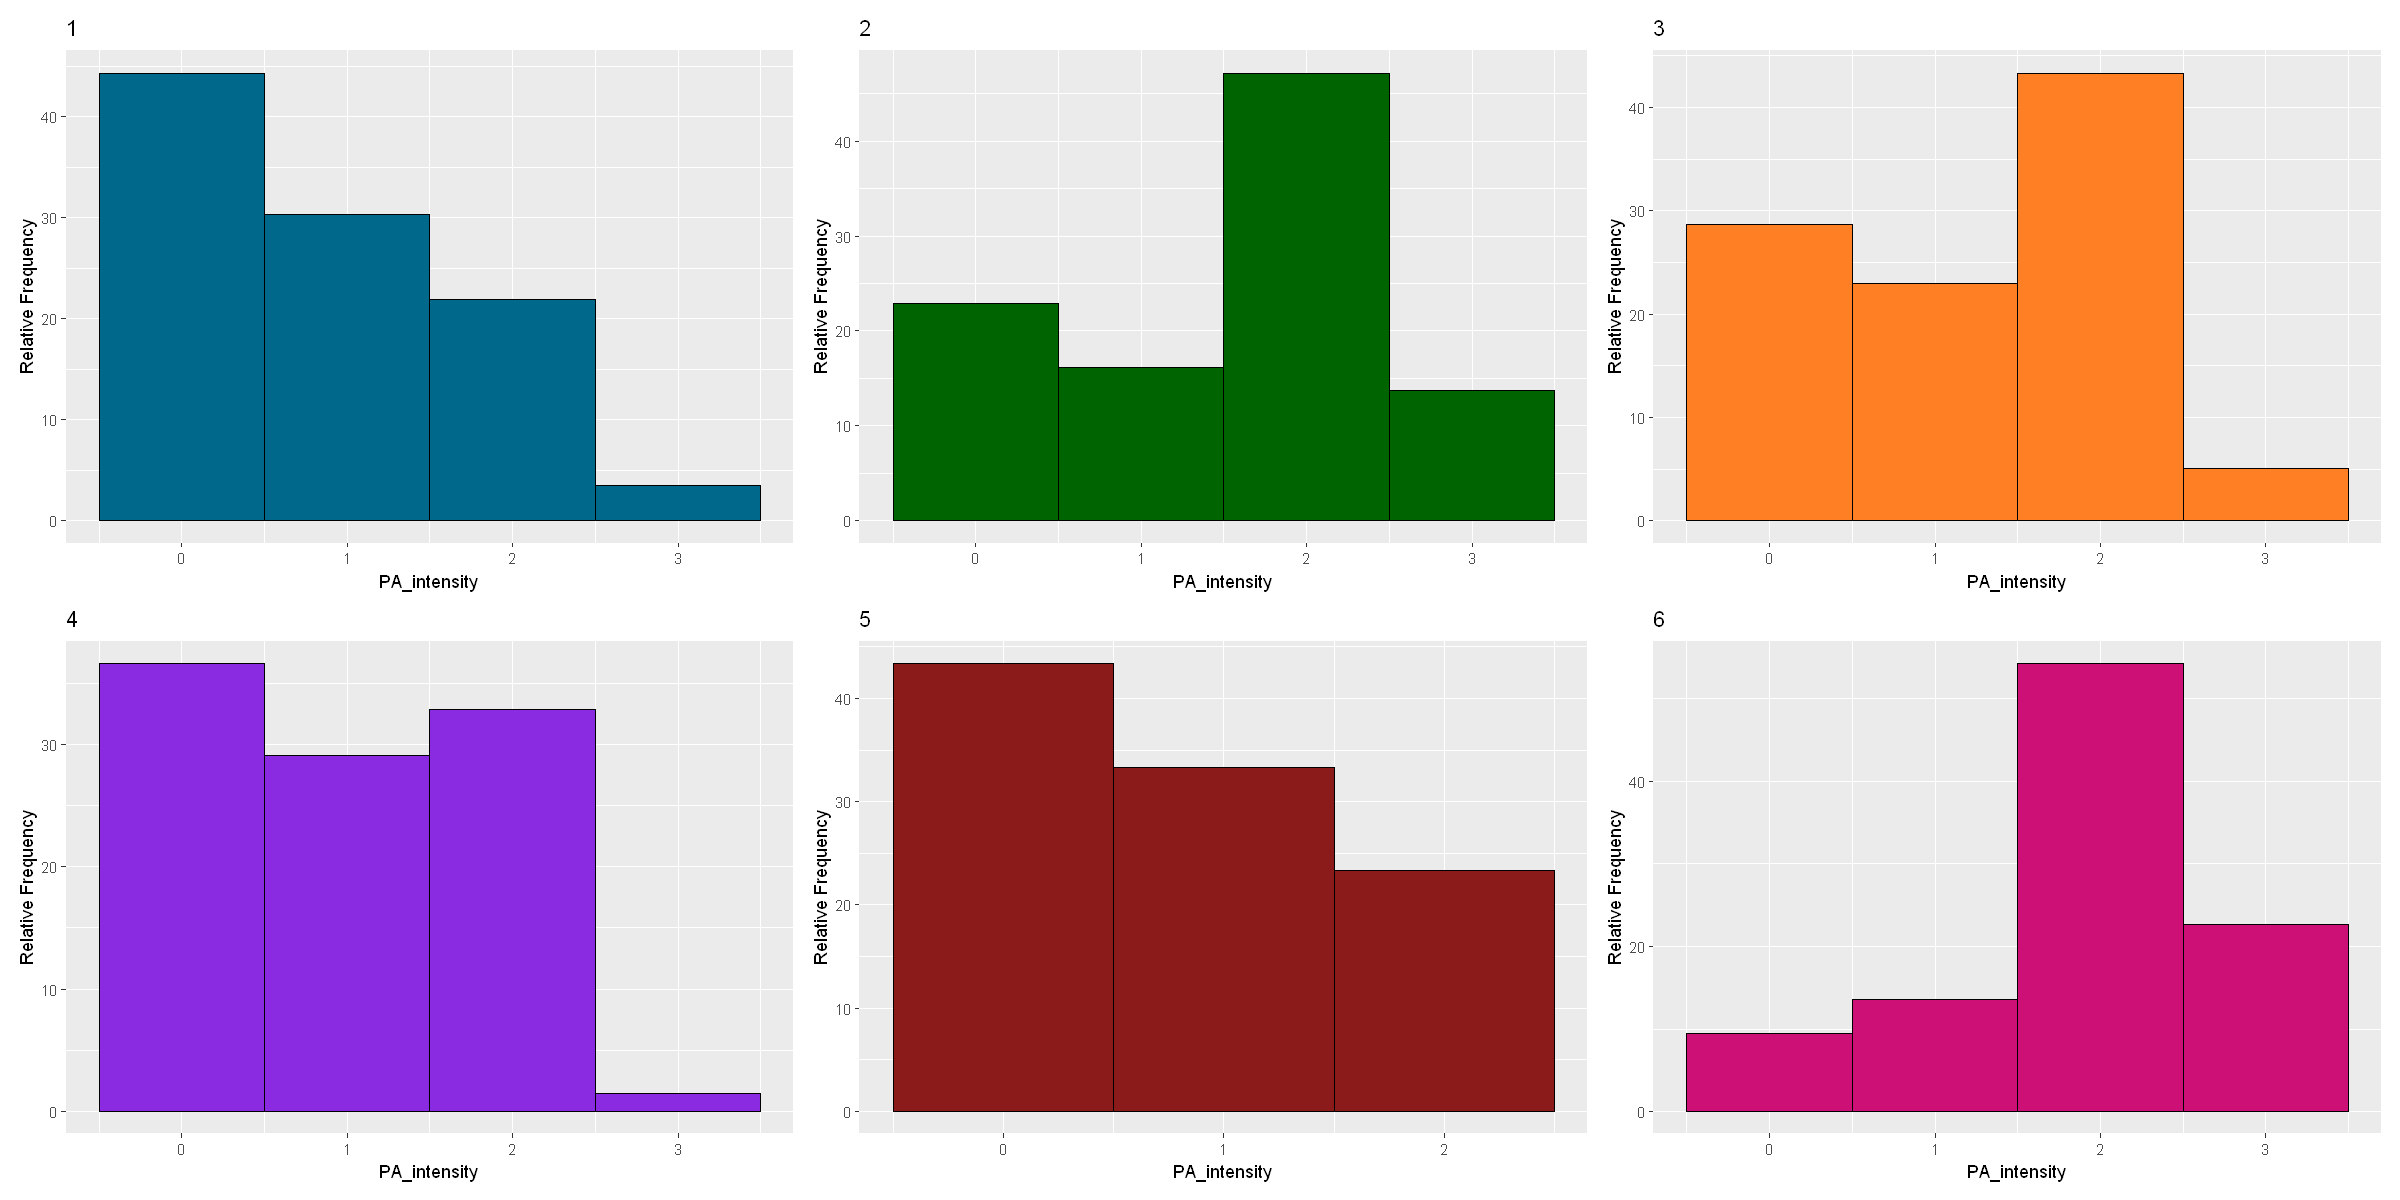

In [108]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_intensity))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_intensity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency") + ggtitle(cl)
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Exercise Duration

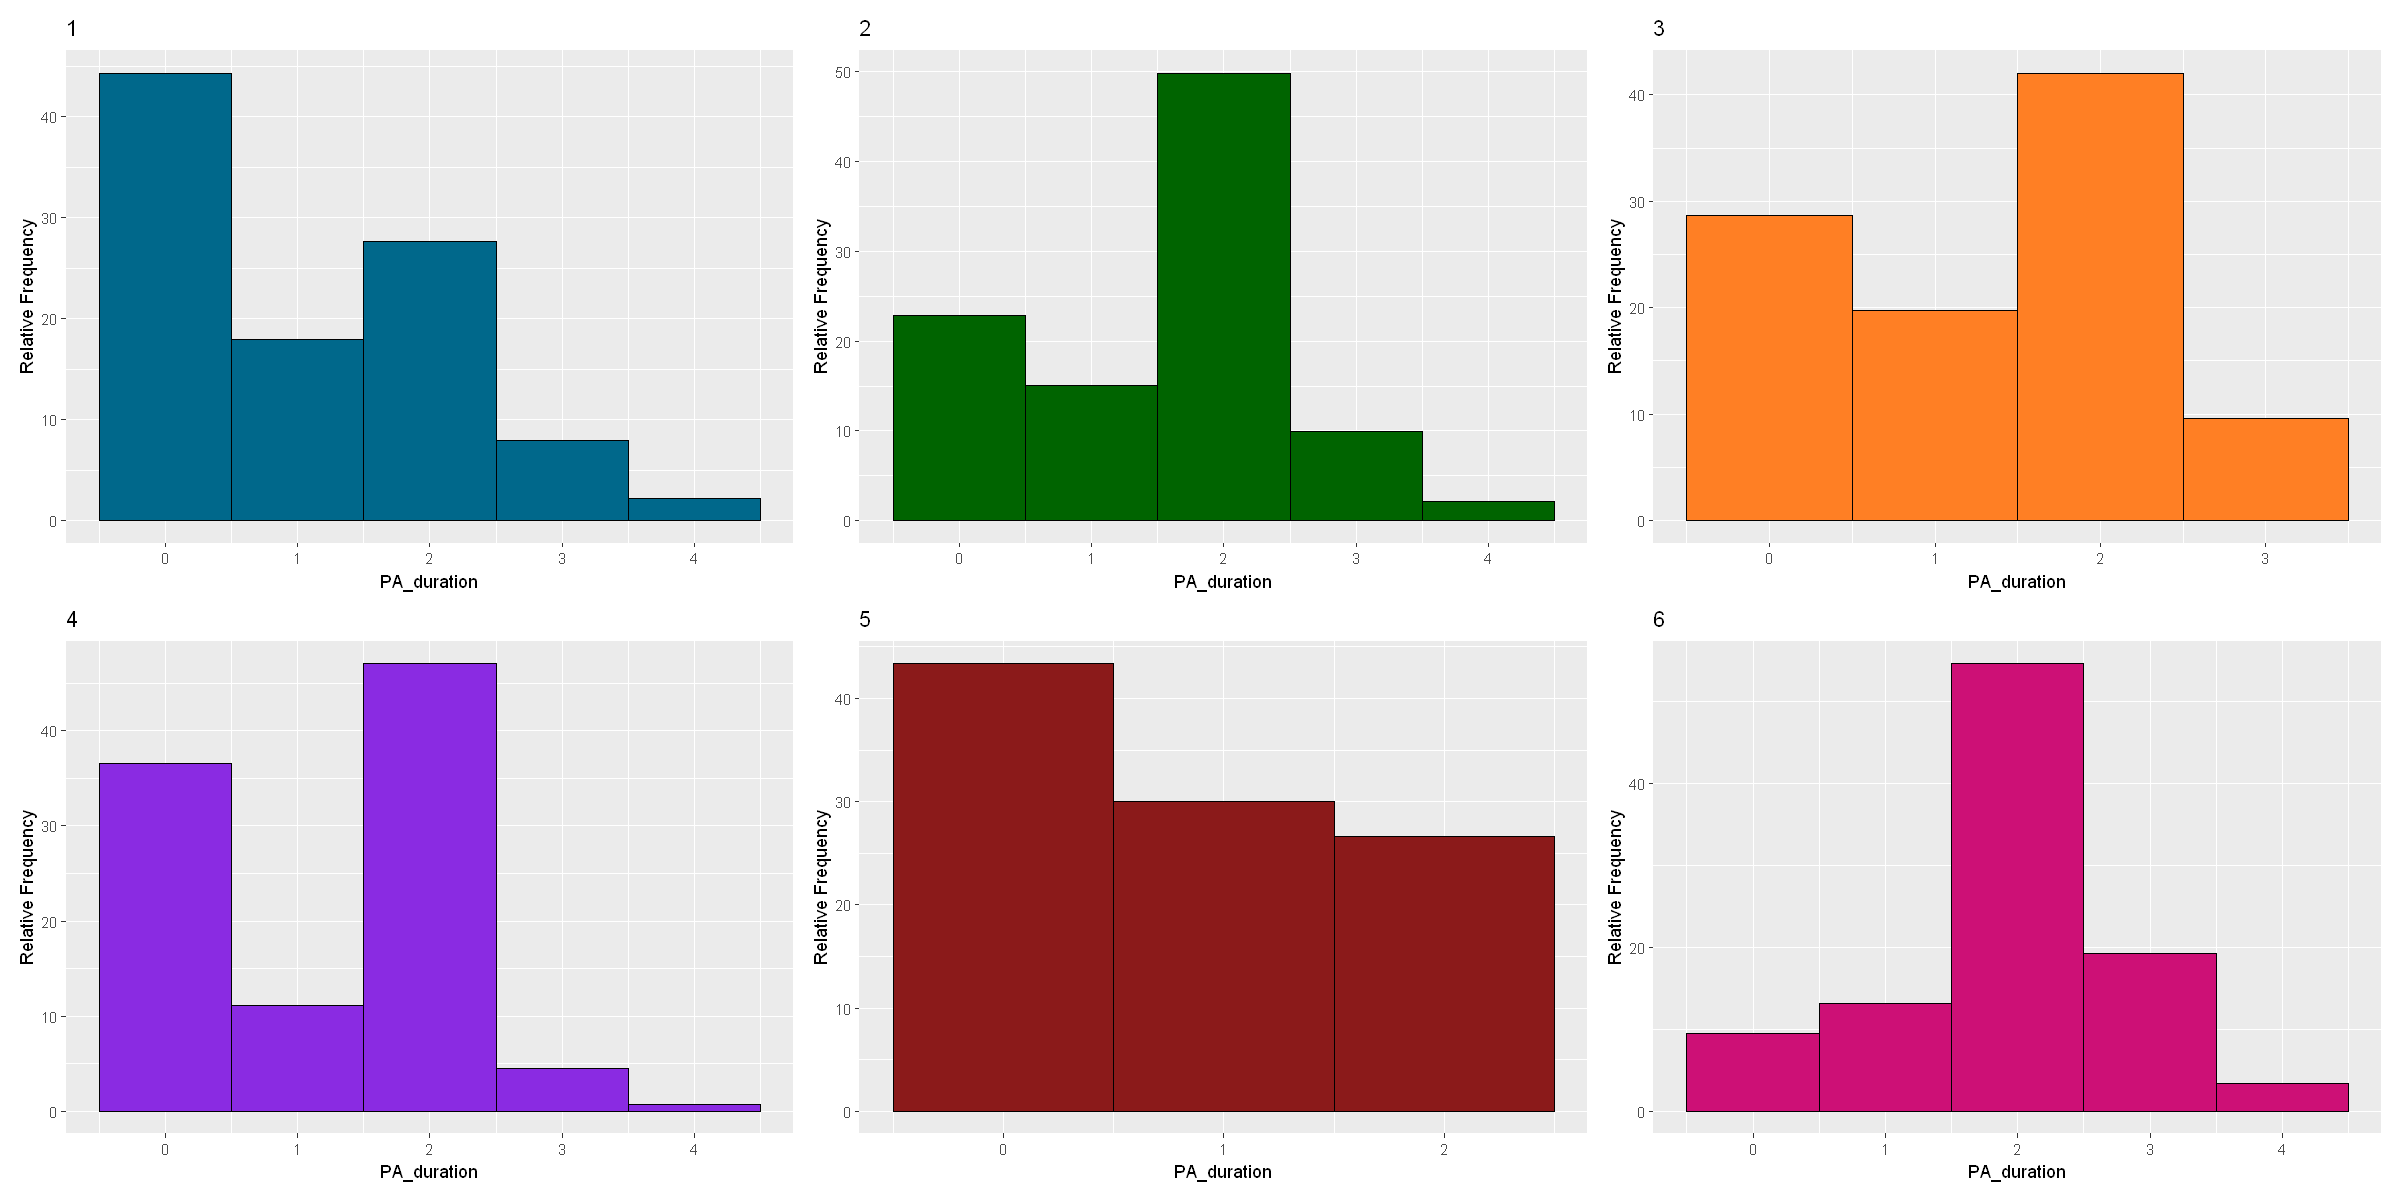

In [109]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_duration))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_duration, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency") + ggtitle(cl)
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Exercise Weekly Frequency

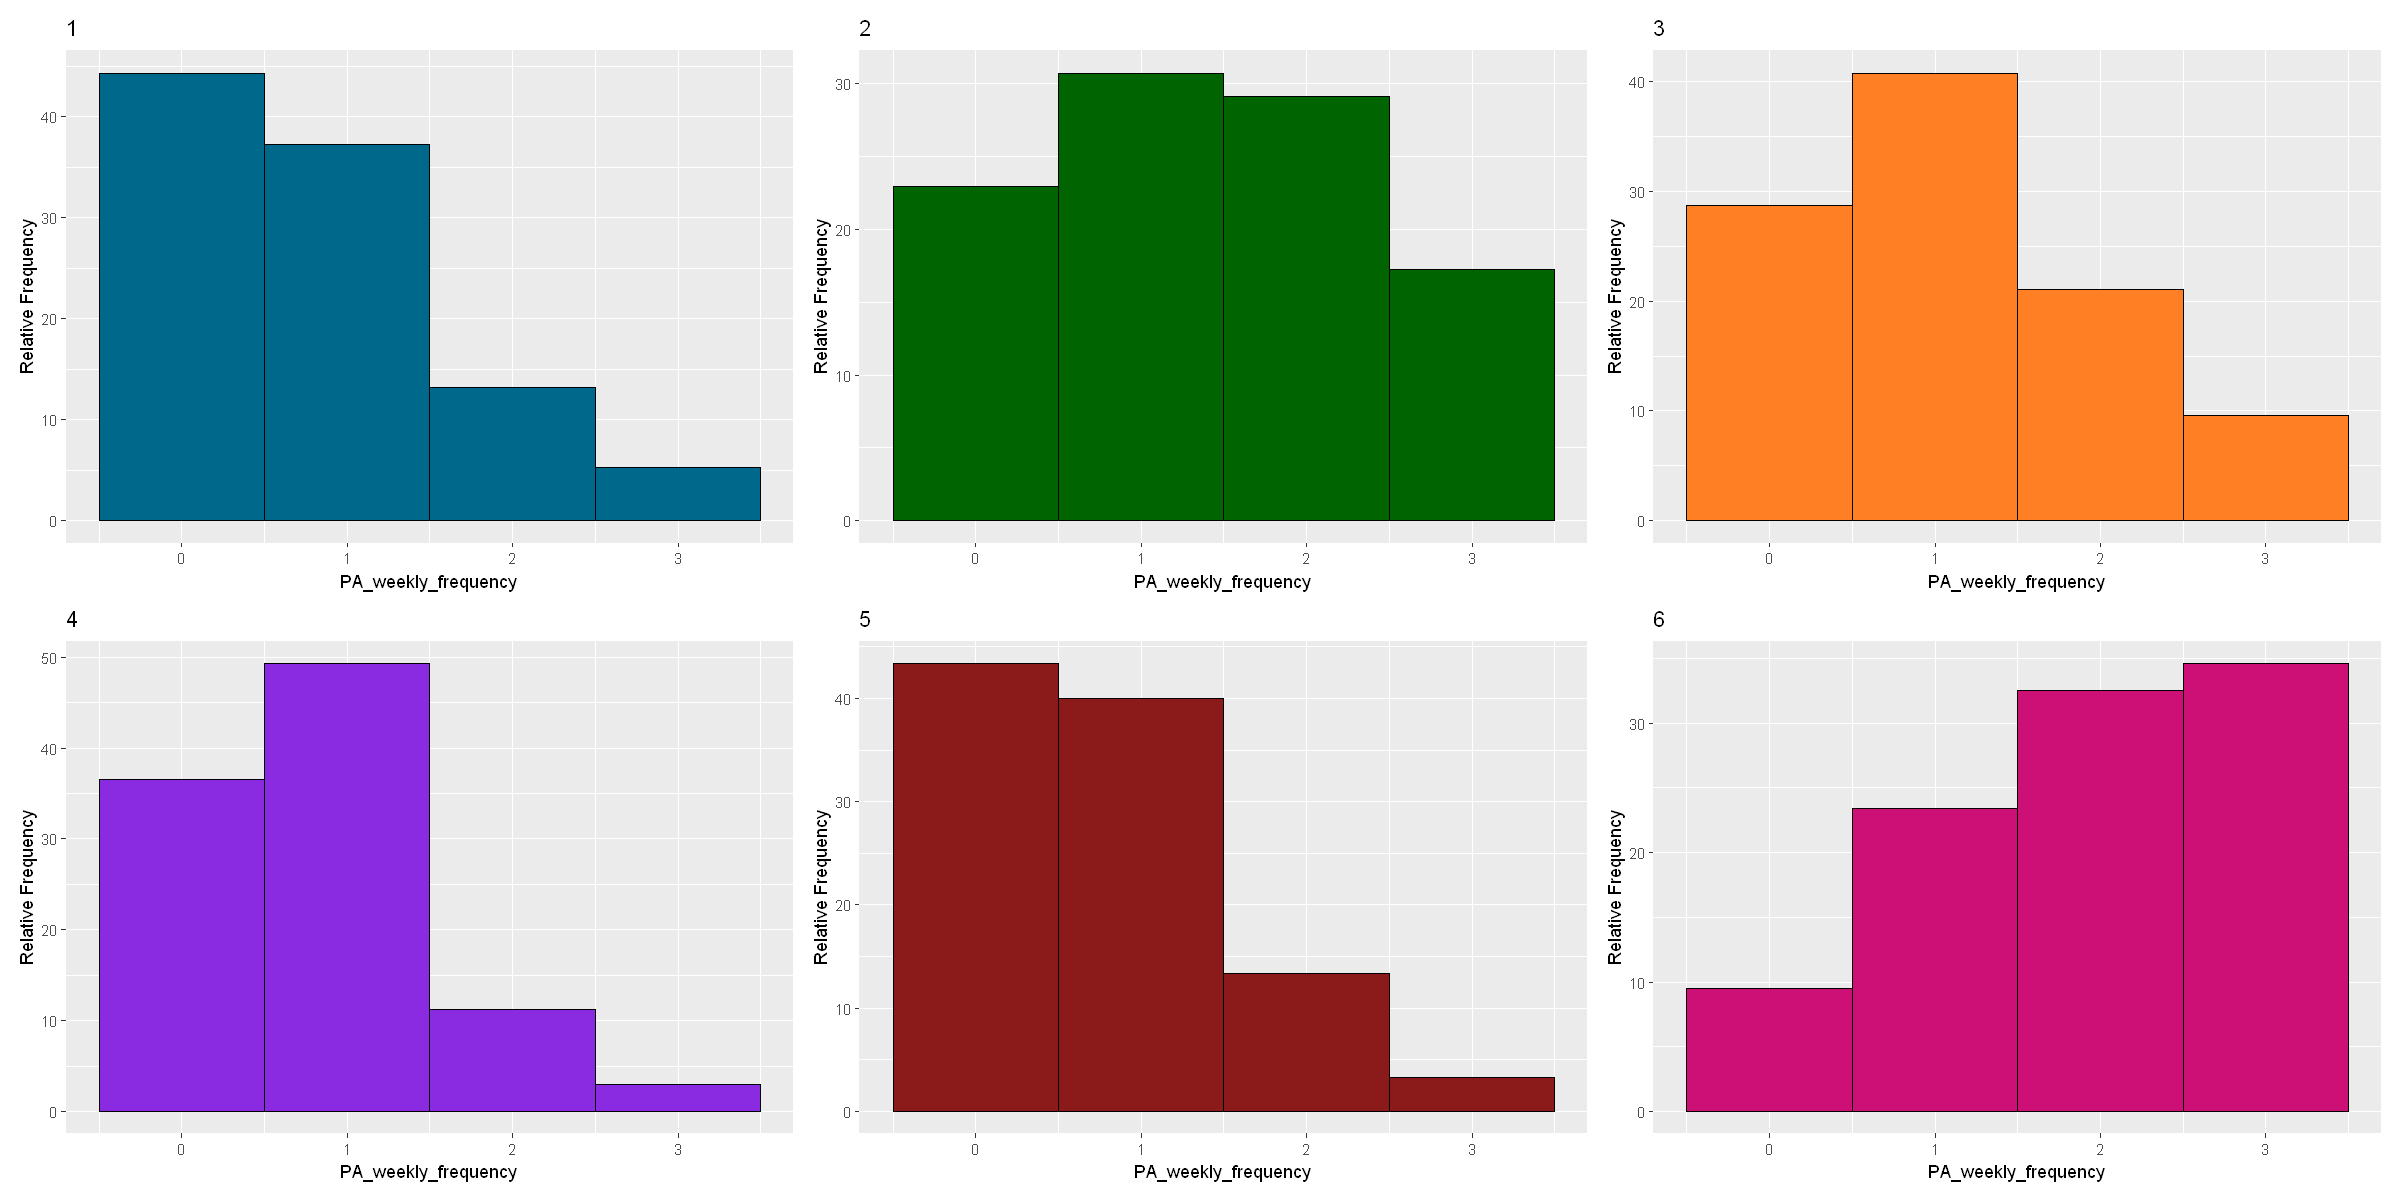

In [110]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_weekly_frequency))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_weekly_frequency, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency") + ggtitle(cl)
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Income Range

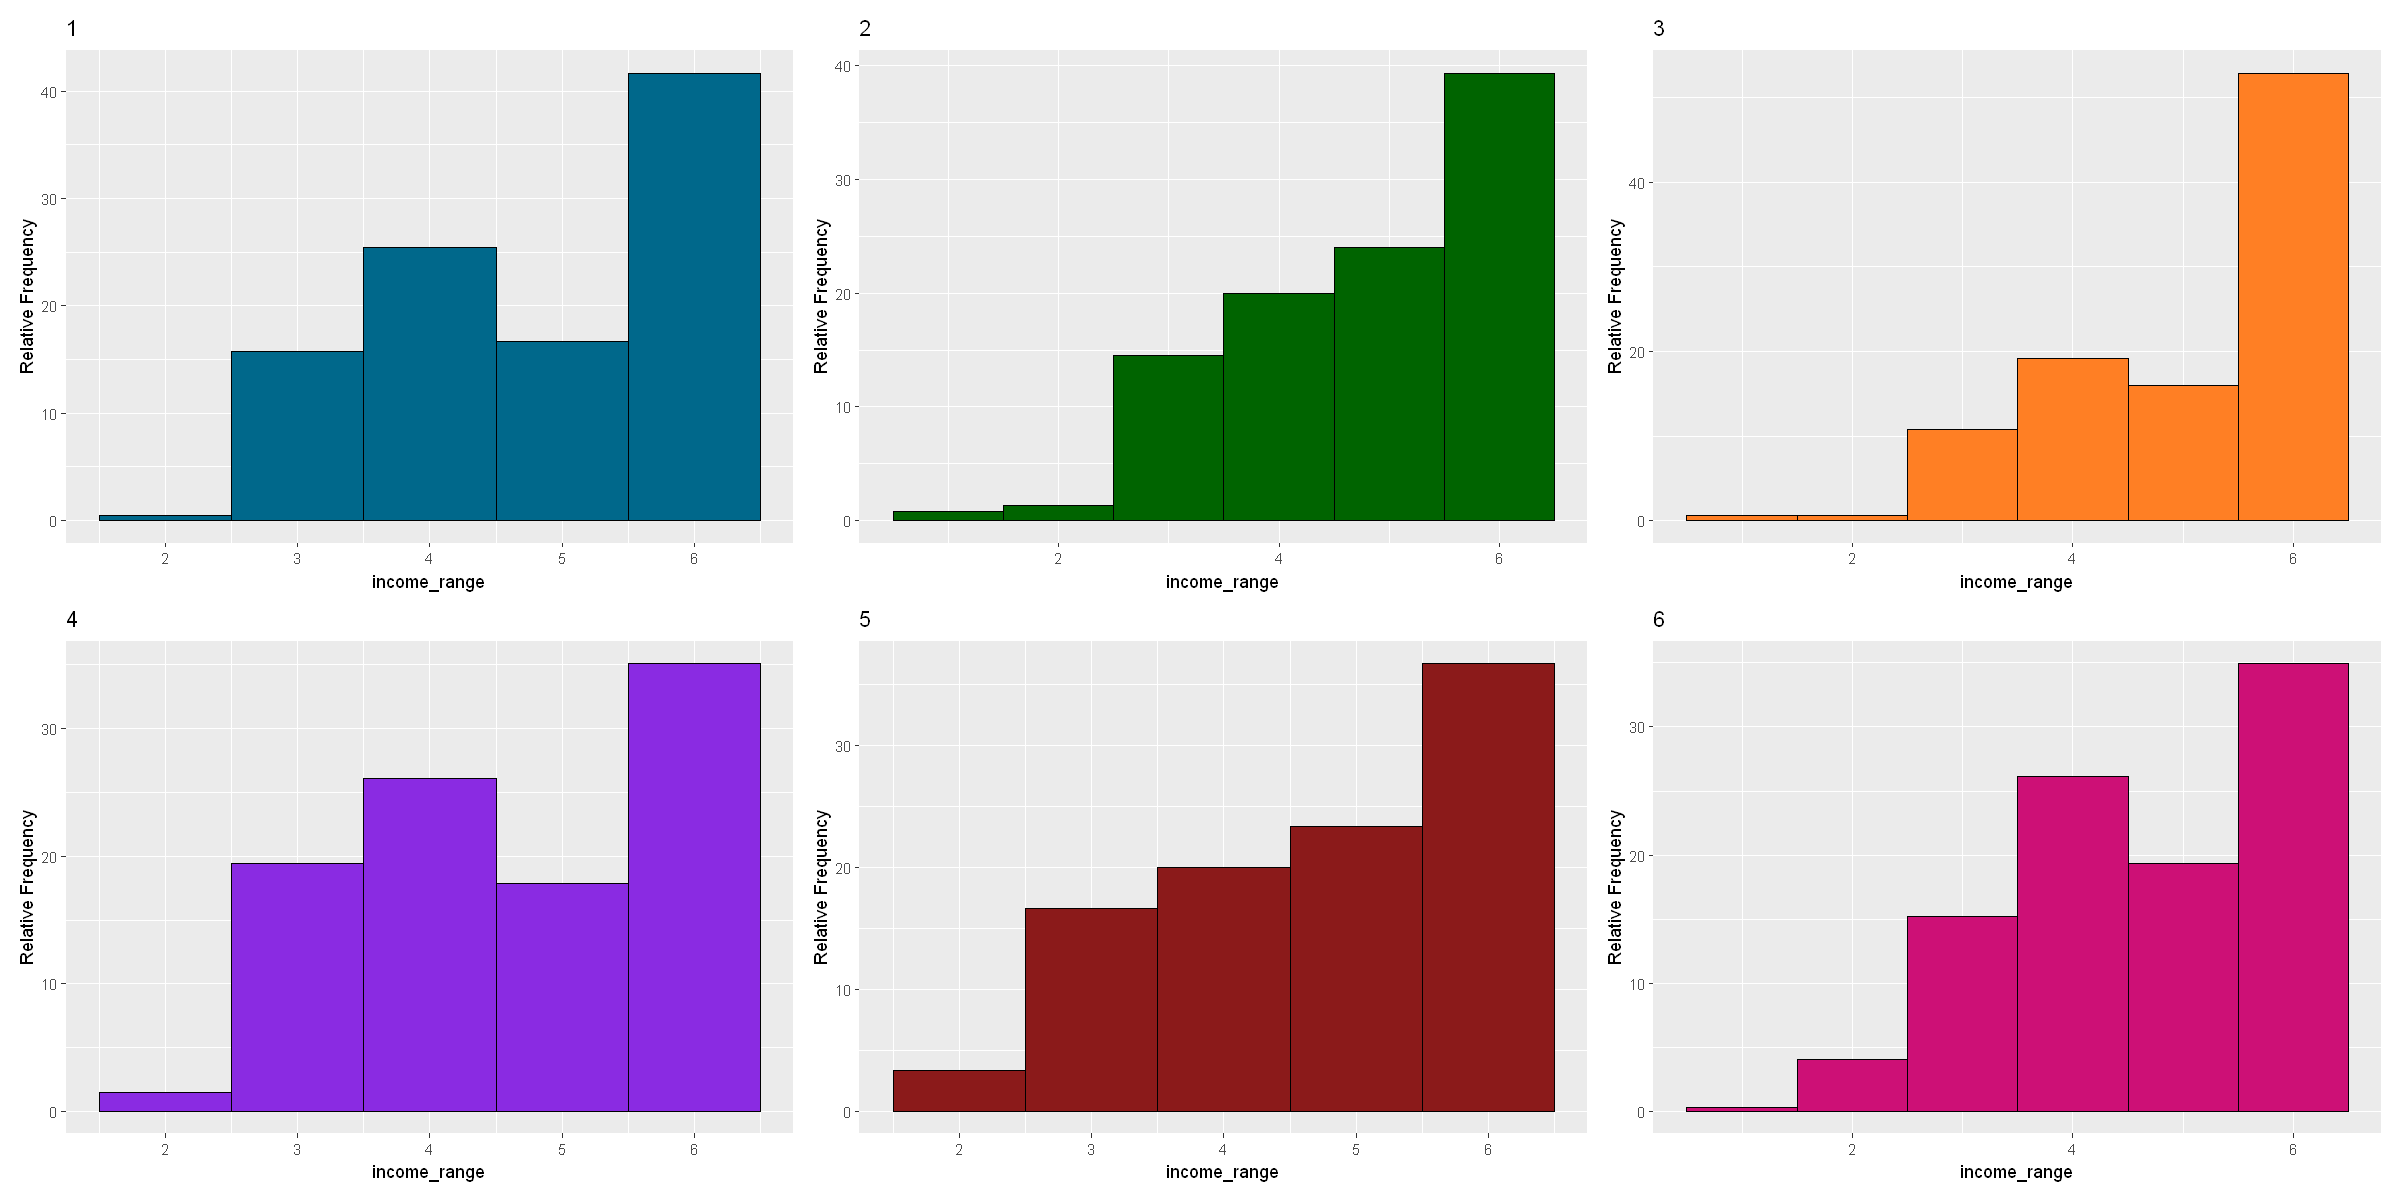

In [111]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$income_range))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=income_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency") + ggtitle(cl)
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Age Range

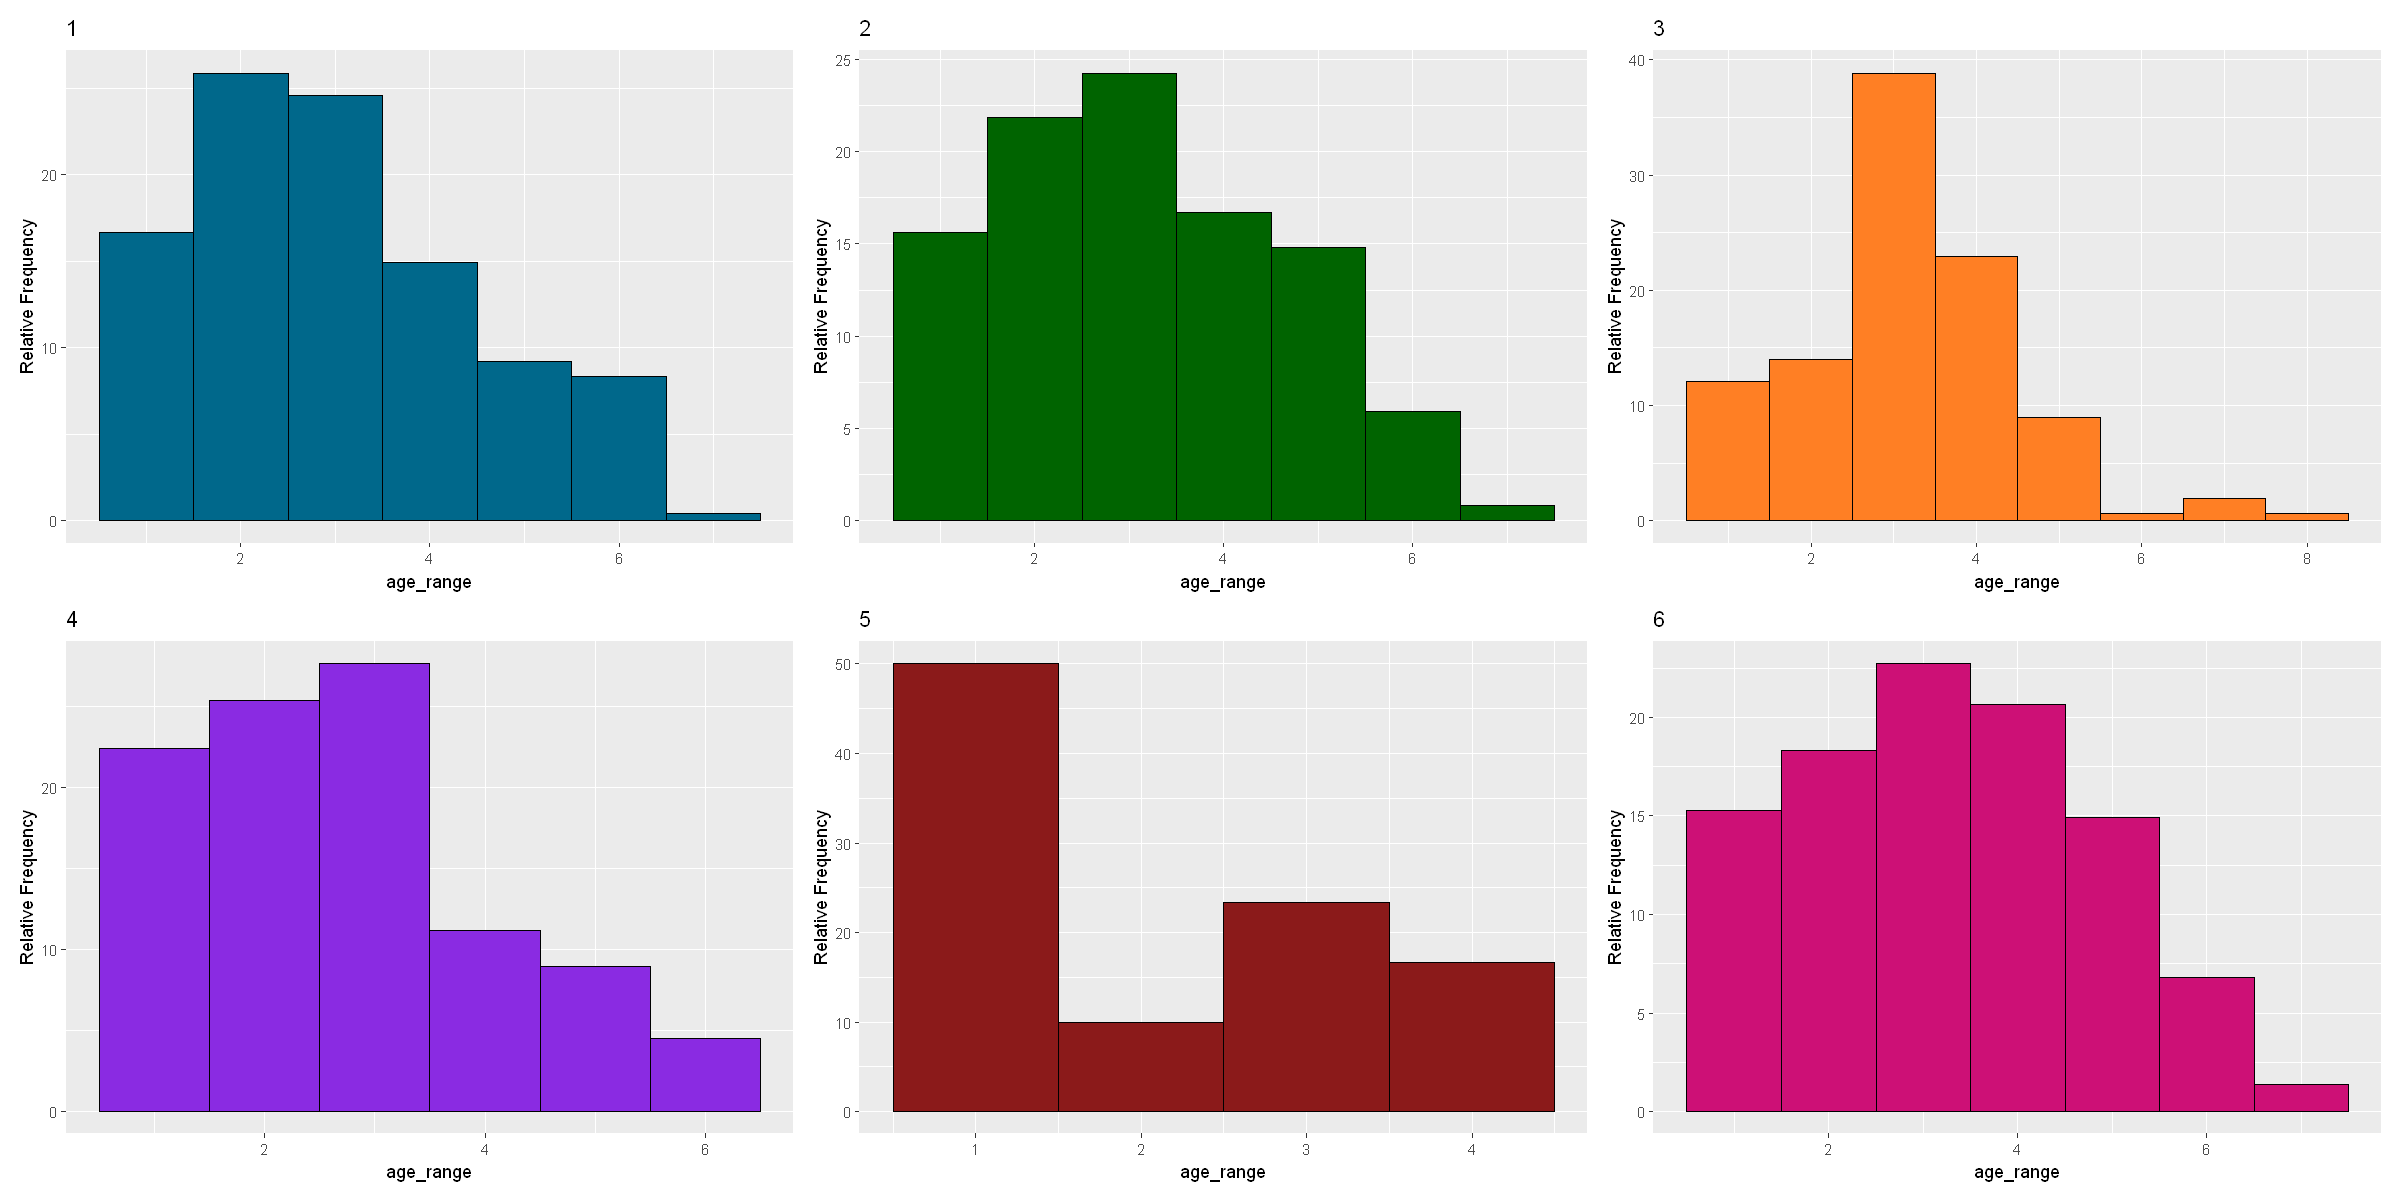

In [112]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$age_range))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=age_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency") + ggtitle(cl)
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Sex

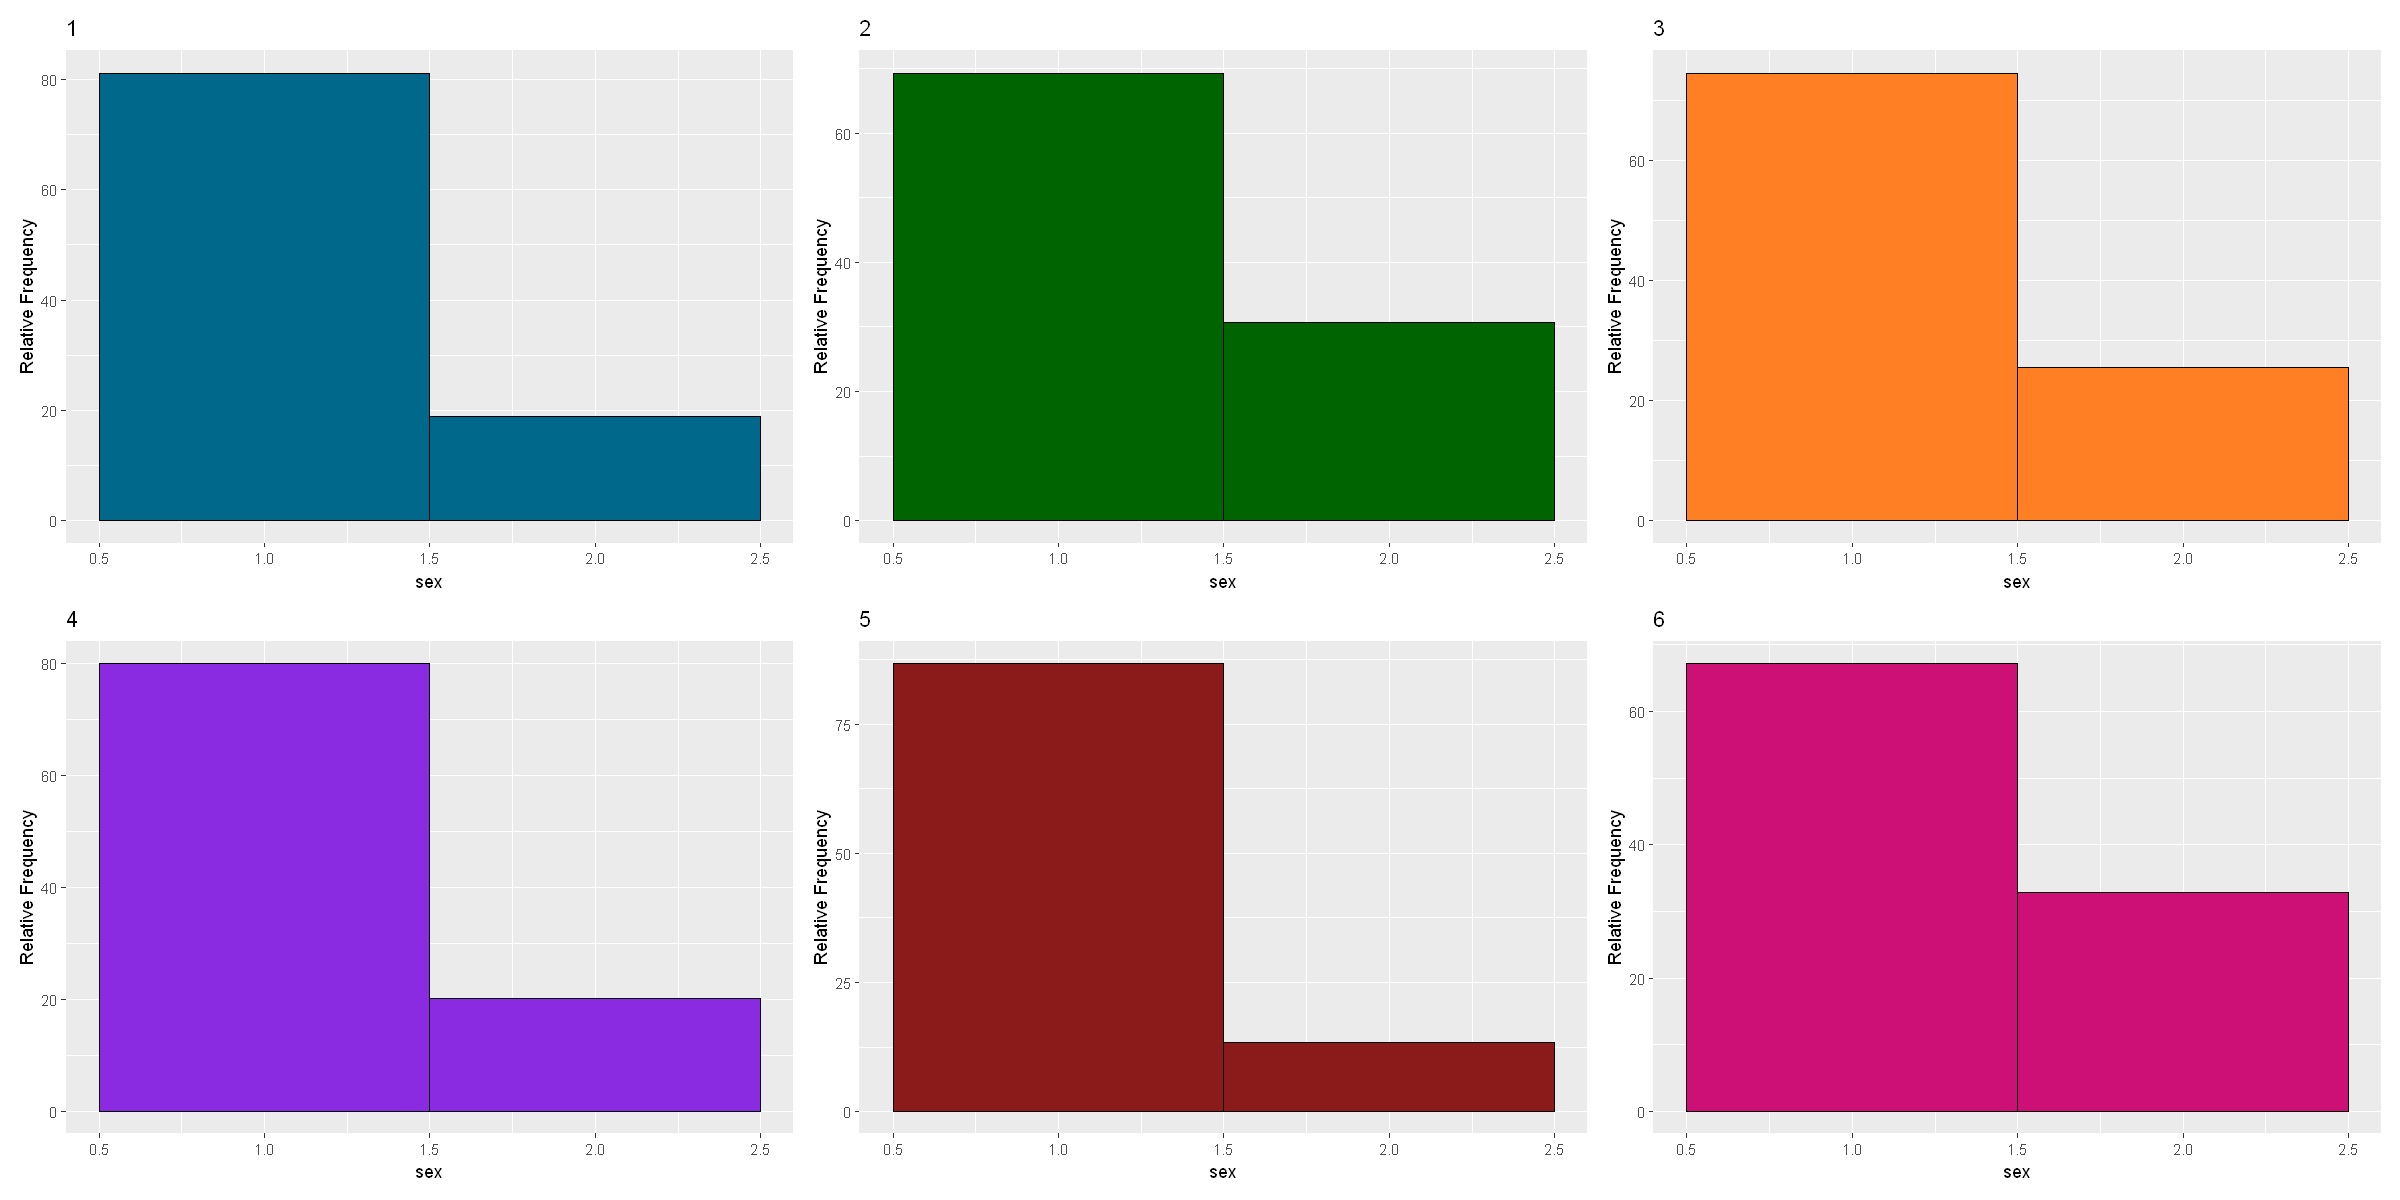

In [113]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$sex))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=sex, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency") + ggtitle(cl)
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Scholarity

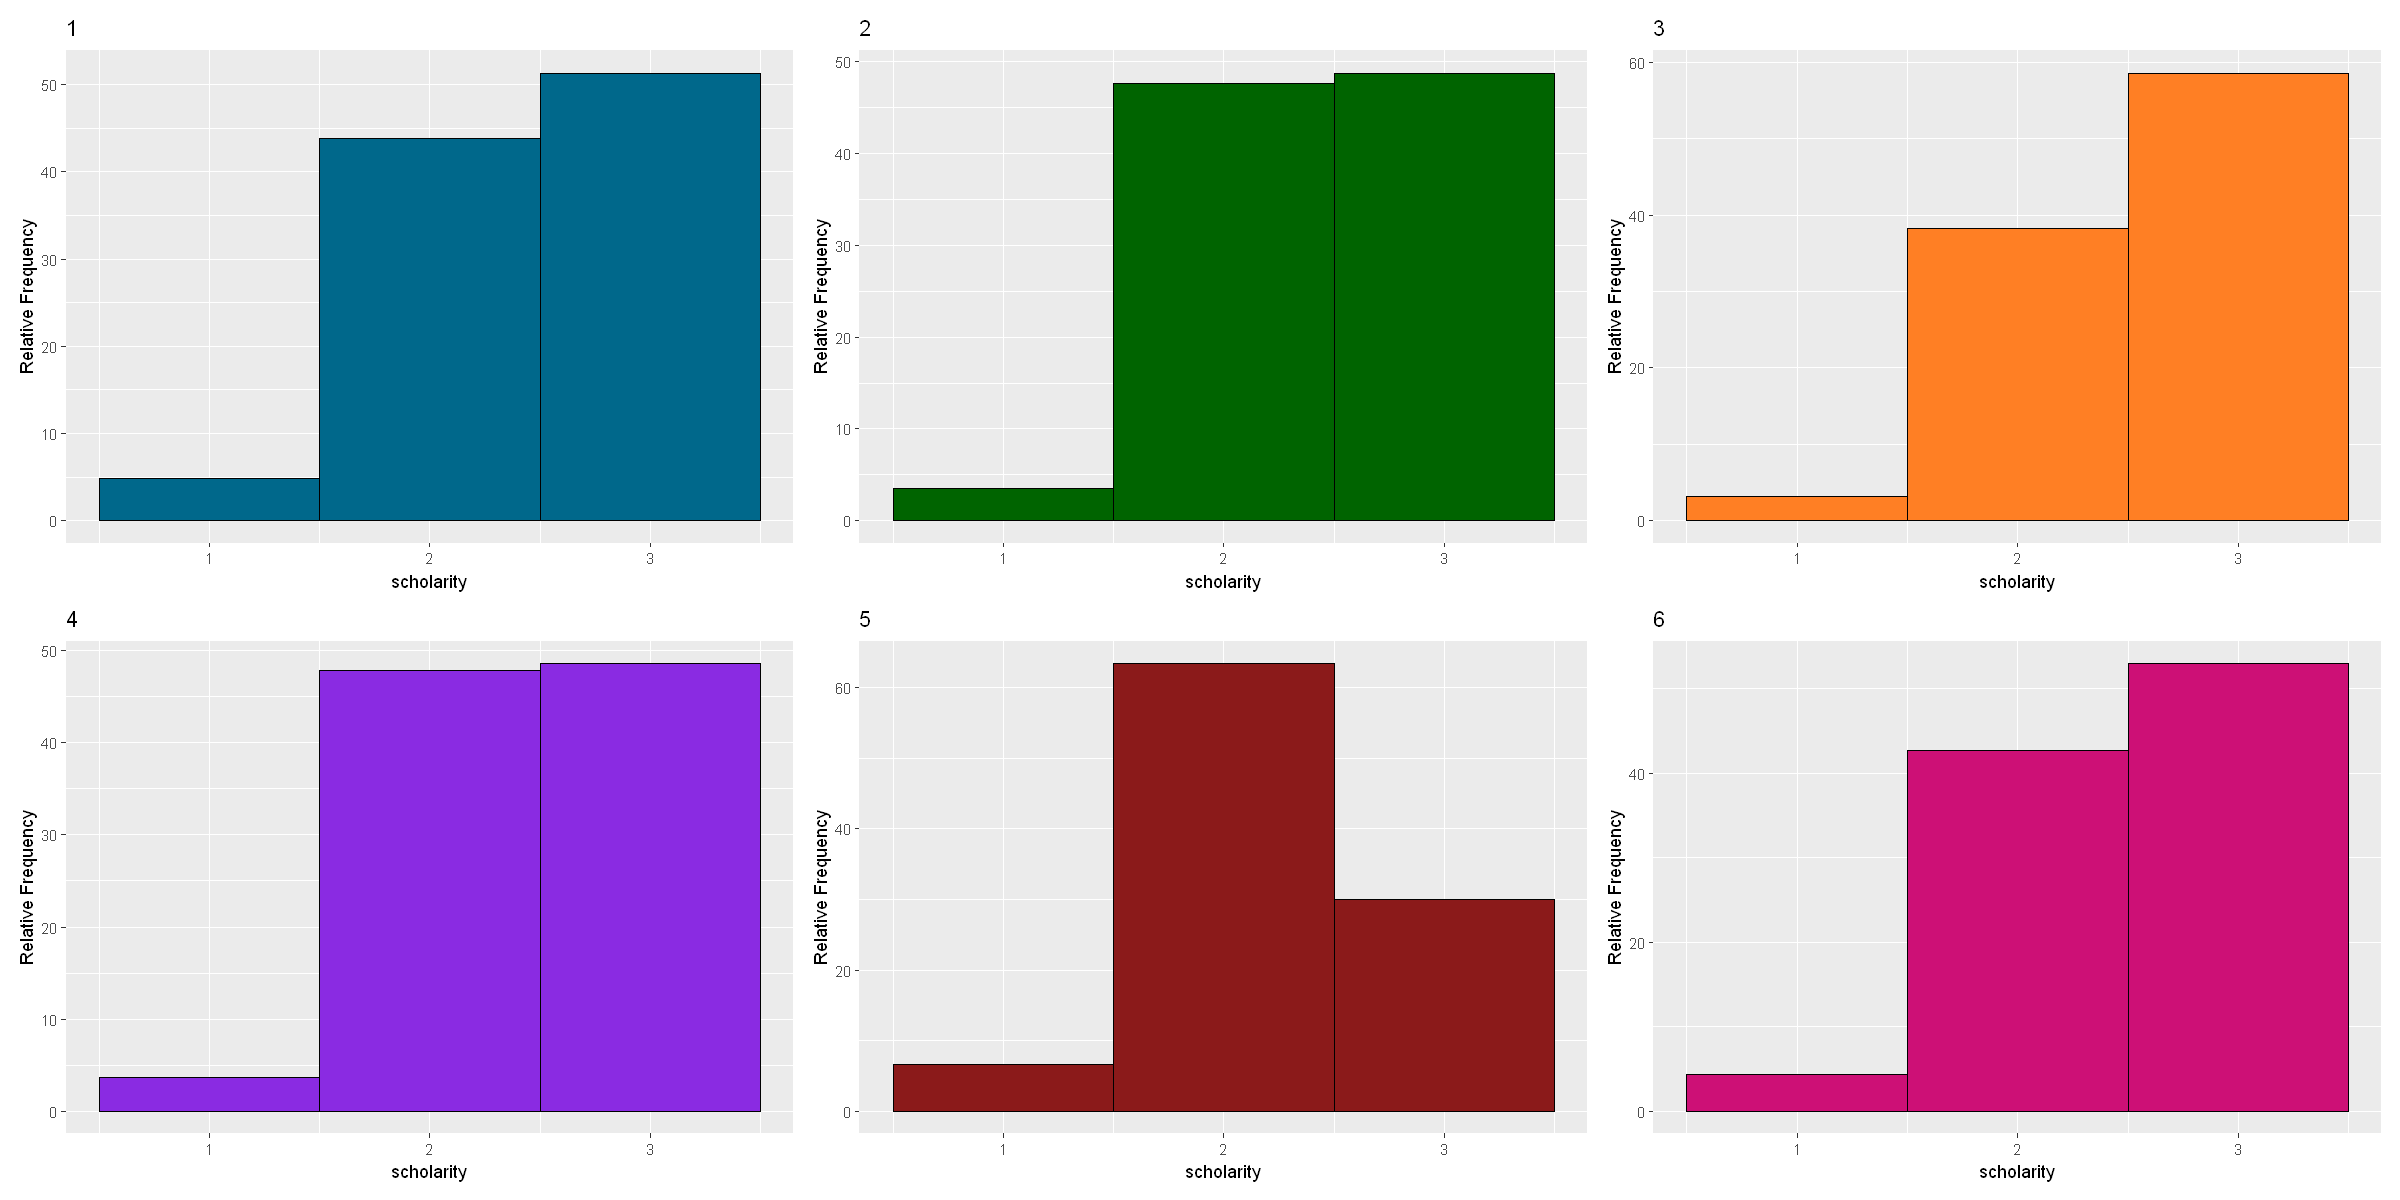

In [114]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$scholarity))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=scholarity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency") + ggtitle(cl)
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)

#### All charts

In [115]:
# df_during[, -c(ncol(df_during))] <- lapply(df_during[, -c(ncol(df_during))], as.factor)
# lapply(df_during, levels)[c("volleyball", "basketball")]
# df_during <- subset(df_during, select = -c(volleyball, basketball))

$volleyball
[1] "0"

$basketball
[1] "0"

In [122]:
# dummy <- dummyVars(" ~ .", data=df_during)
# df_during_encoded <- data.frame(predict(dummy, newdata = df_during)) 

In [117]:
# df_spider <- df_during_encoded %>% group_by(cluster) %>% summarise(
#                                     practice = sum(PA_practice_during.1),
#                                     sedentary = sum(sedentary_time_range_during.1),
#                                     intesity1 = sum(PA_intensity.1),
#                                     intesity2 = sum(PA_intensity.2),
#                                     intesity3 = sum(PA_intensity.3),
#                                     duration1 = sum(PA_duration.1),
#                                     duration2 = sum(PA_duration.2),
#                                     duration3 = sum(PA_duration.3),
#                                     duration4 = sum(PA_duration.4),
#                                     frequency1 = sum(PA_weekly_frequency.1),
#                                     frequency2 = sum(PA_weekly_frequency.2),
#                                     frequency3 = sum(PA_weekly_frequency.3)
#                                 )
# df_spider <- df_spider[, -c(1)]
# df_spider

practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
127,99,69,50,8,41,63,18,5,85,30,12
286,128,60,175,51,56,185,37,8,114,108,64
112,57,36,68,8,31,66,15,0,64,33,15
85,65,39,44,2,15,63,6,1,66,15,4
17,20,10,7,0,9,8,0,0,12,4,1
267,59,40,160,67,39,161,57,10,69,96,102


In [118]:
# max_min <- data.frame(
#     practice = c(300, 0),
#     sedentary = c(300, 0),
#     intesity1 = c(300, 0),
#     intesity2 = c(300, 0),
#     intesity3 = c(300, 0),
#     duration1 = c(300, 0),
#     duration2 = c(300, 0),
#     duration3 = c(300, 0),
#     duration4 = c(300, 0),
#     frequency1 = c(300, 0),
#     frequency2 = c(300, 0),
#     frequency3 = c(300, 0)
# )
# rownames(max_min) <- c("Max", "Min")
# df_spider <- rbind(max_min, df_spider)
# df_spider

,practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Max,300,300,300,300,300,300,300,300,300,300,300,300
Min,0,0,0,0,0,0,0,0,0,0,0,0
1,127,99,69,50,8,41,63,18,5,85,30,12
2,286,128,60,175,51,56,185,37,8,114,108,64
3,112,57,36,68,8,31,66,15,0,64,33,15
4,85,65,39,44,2,15,63,6,1,66,15,4
5,17,20,10,7,0,9,8,0,0,12,4,1
6,267,59,40,160,67,39,161,57,10,69,96,102


In [119]:
# create_beautiful_radarchart <- function(data, color = "#00AFBB", 
#                                         vlabels = colnames(data), vlcex = 0.7,
#                                         caxislabels = NULL, title = NULL, ...){
#   radarchart(
#     data, axistype = 1,
#     # Customize the polygon
#     pcol = color, pfcol = scales::alpha(color, 0.5), plwd = 2, plty = 1,
#     # Customize the grid
#     cglcol = "grey", cglty = 1, cglwd = 0.8,
#     # Customize the axis
#     axislabcol = "grey", 
#     # Variable labels
#     vlcex = vlcex, vlabels = vlabels,
#     caxislabels = caxislabels, title = title, ...
#   )
# }

In [120]:
# df_spider <- df_spider[c("Max", "Min", 3, 6, 8, 5, 7,  1, 2, 4), ]
# df_spider

,practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Max,300,300,300,300,300,300,300,300,300,300,300,300
Min,0,0,0,0,0,0,0,0,0,0,0,0
3,112,57,36,68,8,31,66,15,0,64,33,15
6,267,59,40,160,67,39,161,57,10,69,96,102
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,17,20,10,7,0,9,8,0,0,12,4,1
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,127,99,69,50,8,41,63,18,5,85,30,12
2,286,128,60,175,51,56,185,37,8,114,108,64


In [123]:

# colors <-  c("#00AFBB", "#E7B800", "#FC4E07", '#a432a8')
# titles <- c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6", "Cluster 7", "Cluster 8")
# op <- par(mar = c(1, 3, 3, 3))


# create_beautiful_radarchart(
#   data = df_spider, 
#   caxislabels = c(0, 10, 20, 30),
#   color = colors,

# )


# legend(
#   x = "bottom", legend = rownames(df_spider[-c(1,2),]), horiz = TRUE,
#   bty = "n", pch = 20 , col =colors,
#   text.col = "black", cex = 1, pt.cex = 1.5
# )
# par(op)